# GRIP - THE SPARKS FOUNDATION
## Author - Lakshya Dayalan
### Data Science & Business Analytics Internship
# Task 3 - Exploratory Data Analysis - Retail

To perform Exploratory Data Analysis on dataset 'SampleSuperstore'

#### Impotant libraries which we will use in this project:-

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Load our dataset

In [3]:
df = pd.read_csv(r"C:\Users\vishal pc\Downloads\SampleSuperstore.csv", )
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


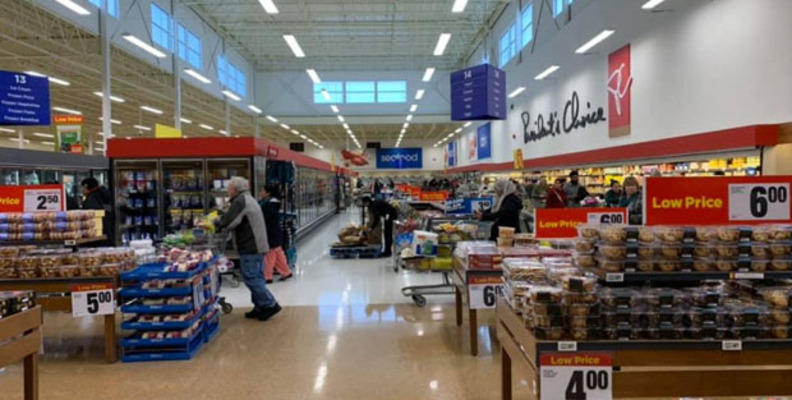

In [7]:
from IPython import display
display.Image(r"C:\Users\vishal pc\Downloads\store.jpg")

#### To check the shape of our dataset

In [8]:
df.shape

(9994, 13)

#### To check the size of our dataset

In [9]:
df.size

129922

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [11]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [12]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [13]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

#### To check for duplicate values

In [14]:
duplicate_count = df.duplicated().sum()
print(duplicate_count)

17


#### Drop duplicates

In [15]:
df = df.drop_duplicates()

In [16]:
df.duplicated().sum()

0

In [17]:
type(df)

pandas.core.frame.DataFrame

#### Let's check the unique values count of all the features


In [18]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

#### Drop the unwanted columns


In [19]:
df = df.drop("Postal Code", axis=1)

In [20]:
df.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


#### Correlation between the numerical features

In [21]:
df1 = df[["Sales", "Quantity", "Discount", "Profit"]]
df1.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


#### Data Visualization

<Axes: >

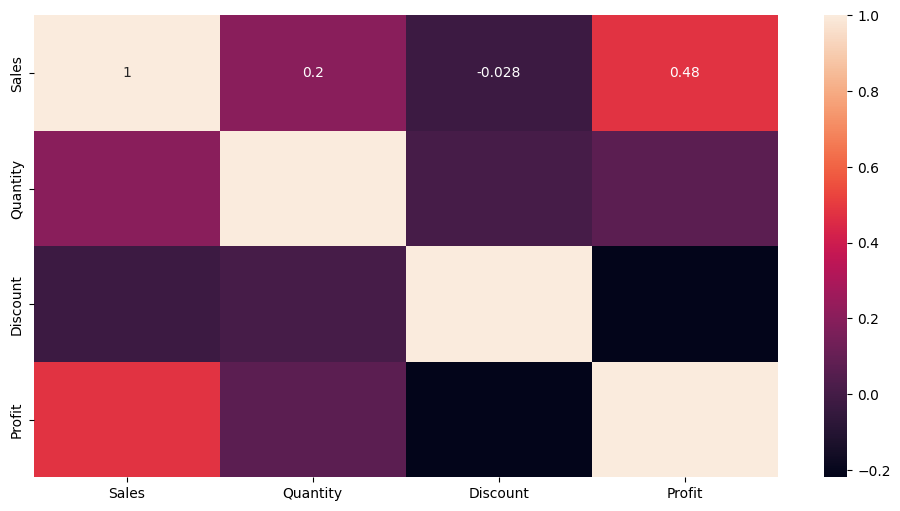

In [22]:
plt.figure(figsize=(12,6))
sns.heatmap(df1.corr(), annot=True)

#### State wise Analysis

In [27]:
df_state = df["State"].value_counts()
df_state

State
California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada  

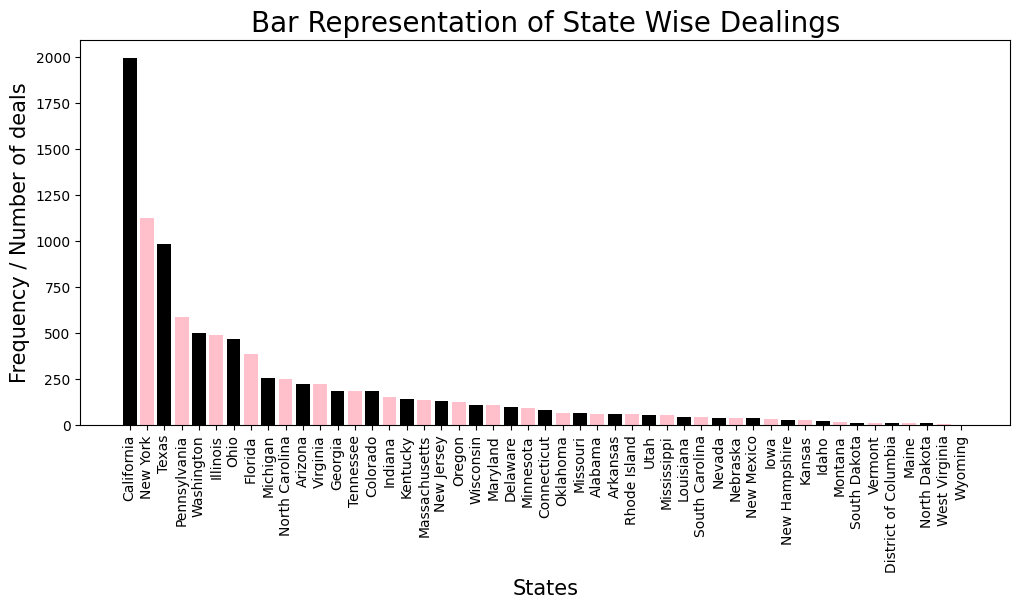

In [28]:
plt.figure(figsize=(12,5))
colors = ['black', 'pink']
plt.bar(df_state.index, df_state.values, color=colors)
plt.xlabel("States", fontsize=15)
plt.ylabel("Frequency / Number of deals", fontsize=15)
plt.title("Bar Representation of State Wise Dealings", fontsize=20)
plt.xticks(rotation=90)
plt.show()

#### City wise sales analysis

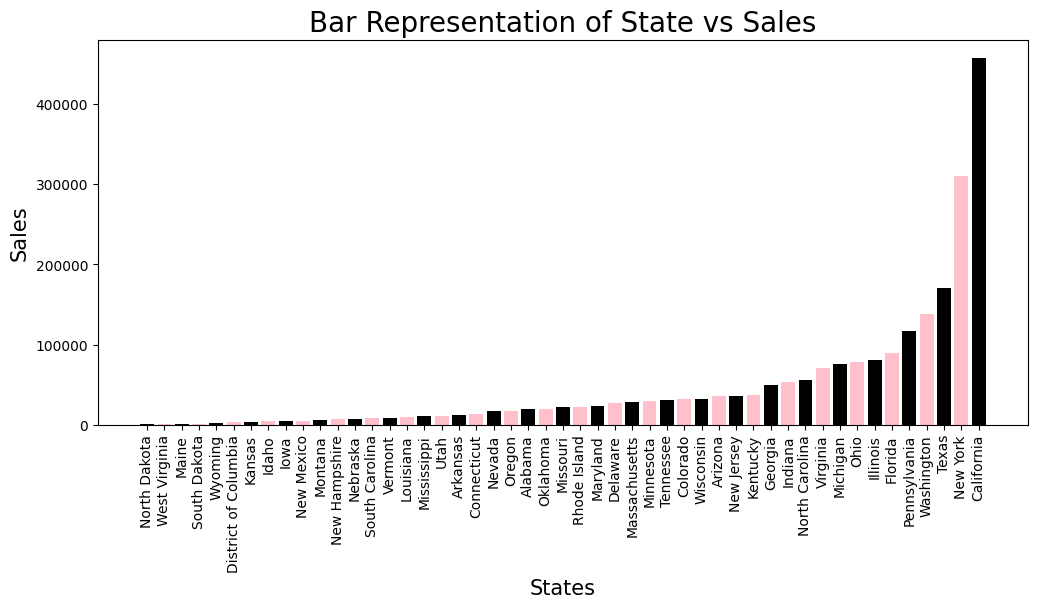

In [29]:
state_sales = df.groupby('State')['Sales'].sum().reset_index()
state_sales = state_sales.sort_values(by='Sales', ascending=True) 


plt.figure(figsize=(12, 5))
colors = ['black', 'pink']
plt.bar(state_sales['State'], state_sales['Sales'], color=colors)
plt.xlabel("States", fontsize=15)
plt.ylabel("Sales", fontsize=15)
plt.title("Bar Representation of State vs Sales", fontsize=20)
plt.xticks(rotation=90)
plt.show()

#### City wise Profit analysis

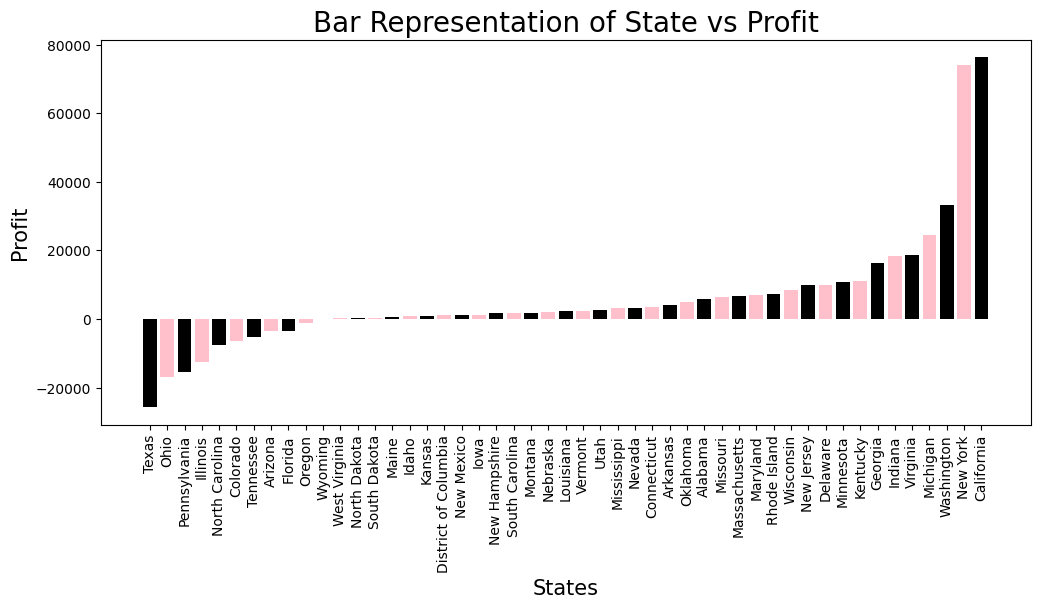

In [30]:
state_sales = df.groupby('State')['Profit'].sum().reset_index()
state_sales = state_sales.sort_values(by='Profit', ascending=True)  

plt.figure(figsize=(12, 5))
colors = ['black', 'pink']
plt.bar(state_sales['State'], state_sales['Profit'], color=colors)
plt.xlabel("States", fontsize=15)
plt.ylabel("Profit", fontsize=15)
plt.title("Bar Representation of State vs Profit", fontsize=20)
plt.xticks(rotation=90)
plt.show()

#### City wise Discount analysis

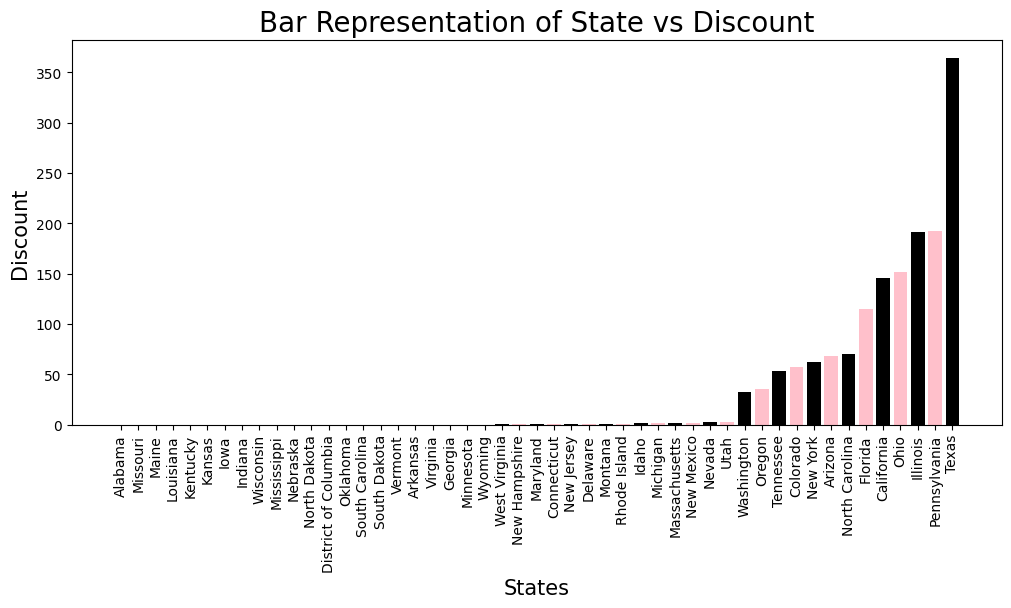

In [32]:
state_sales = df.groupby('State')['Discount'].sum().reset_index()
state_sales = state_sales.sort_values(by='Discount', ascending=True)  


plt.figure(figsize=(12, 5))
colors = ['black', 'pink']
plt.bar(state_sales['State'], state_sales['Discount'], color=colors)
plt.xlabel("States", fontsize=15)
plt.ylabel("Discount", fontsize=15)
plt.title("Bar Representation of State vs Discount", fontsize=20)
plt.xticks(rotation=90)
plt.show()

### Observations from State wise Analysis :-

 - Highest Number of deal = Califonia
 - Lowest Number of deal = Wyoming
 - Highest amount of sales = Califonia & New York City
 - Lowest amount of sales = North Dakota
 - Highest Profit = Califonia
 - Lowest Profit = West Virginia
 - Highest discount offering = Texas

#### Ship Mode Analysis

In [33]:
df_shipmode = df["Ship Mode"].value_counts()
df_shipmode

Ship Mode
Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: count, dtype: int64

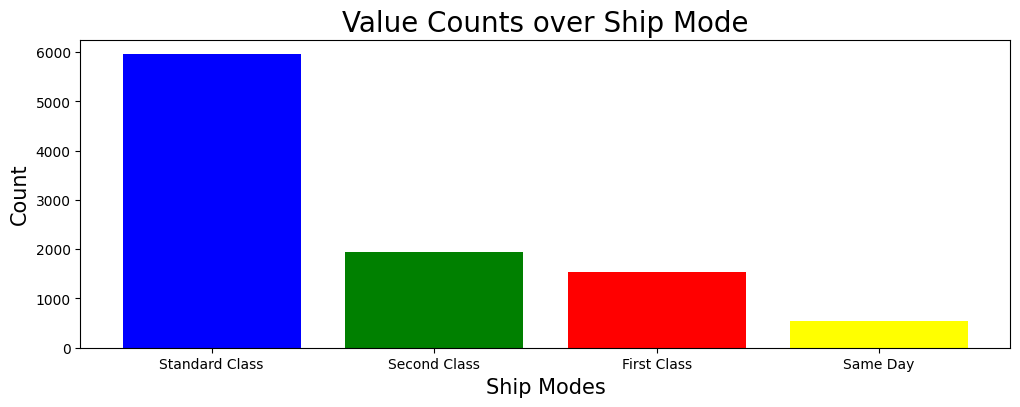

In [34]:
plt.figure(figsize=(12,4))
colors = ['blue', 'green', 'red', "yellow"]
plt.bar(df_shipmode.index, df_shipmode.values, color=colors)
plt.xlabel("Ship Modes", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Value Counts over Ship Mode", fontsize=20)
plt.show()

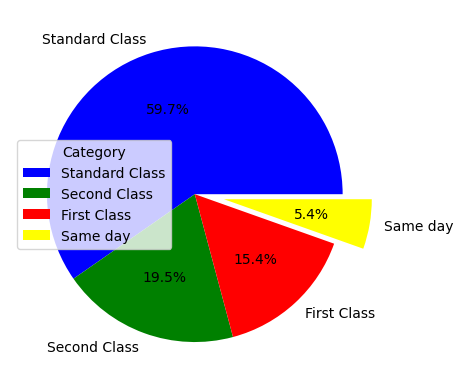

In [35]:
labels = ["Standard Class", "Second Class", "First Class", "Same day"]
mycolors = ['blue', 'green', 'red', "yellow"]
myexplode = [0, 0,0, 0.2]
plt.pie(df["Ship Mode"].value_counts(), labels=labels, autopct='%1.1f%%', colors=mycolors, explode = myexplode)
plt.legend(title="Category")

In [36]:
df_shipmode = df.groupby(['Ship Mode'])[['Sales', 'Profit']].mean()
df_shipmode

,Sales,Profit
Ship Mode,,
First Class,228.614490,31.850134
Same Day,236.755950,29.283924
Second Class,236.323750,29.565956
Standard Class,227.928858,27.534715


#### As we can see majority of the mode which is used by the ship is standard mode 

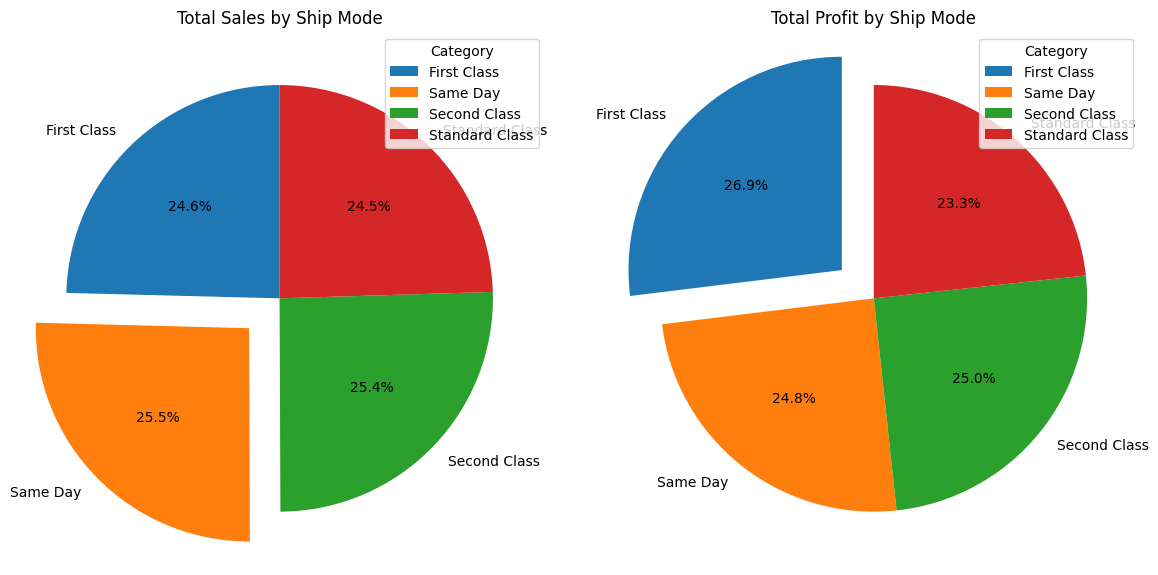

In [37]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
myexplode = [0, 0.2 ,0, 0]
plt.pie(df_shipmode['Sales'], labels=df_shipmode.index, autopct='%1.1f%%', startangle=90, explode= myexplode)
plt.title('Total Sales by Ship Mode')
plt.legend(title="Category")


plt.subplot(1, 2, 2)
myexplode = [0.2, 0,0, 0]
plt.pie(df_shipmode['Profit'], labels=df_shipmode.index, autopct='%1.1f%%', startangle=90, explode= myexplode)
plt.title('Total Profit by Ship Mode')

plt.tight_layout()
plt.legend(title="Category")
plt.show()

### Observations from Ship Mode Analysis :

 - Highly preferred mode = Standard Class (59.7 %)
 - Least preferred mode = Same Day (5.4 %)
 - Highest Sale = Same Day (25.5 %)
 - Highest Profit = First Class (26.9 %)

#### Segment Wise Analysis

In [38]:
df_segment = df["Segment"].value_counts()
df_segment

Segment
Consumer       5183
Corporate      3015
Home Office    1779
Name: count, dtype: int64

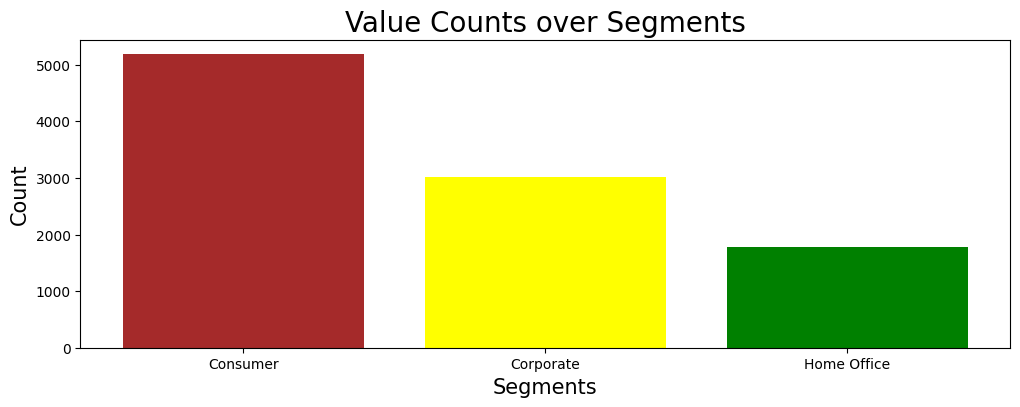

In [39]:
plt.figure(figsize=(12,4))
colors = ['brown', 'yellow', 'green']
plt.bar(df_segment.index, df_segment.values, color=colors)
plt.xlabel("Segments", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Value Counts over Segments", fontsize=20)
plt.show()

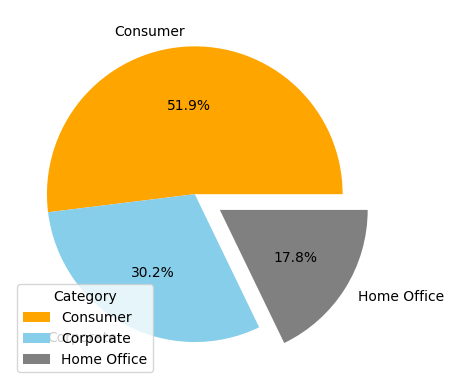

In [40]:
labels = ["Consumer", "Corporate", "Home Office"]
mycolors = ["orange", "skyblue", "grey"]
myexplode = [0, 0, 0.2]
plt.pie(df["Segment"].value_counts(), labels=labels, autopct='%1.1f%%', colors=mycolors, explode = myexplode)
plt.legend(title="Category")

#### From the above representation we can see consumers are our higher contributor 

In [41]:
df_segment = df.groupby(['Segment'])[['Sales', 'Profit']].mean()
df_segment

,Sales,Profit
Segment,,
Consumer,223.969279,25.855188
Corporate,234.185781,30.499164
Home Office,241.311234,33.883643


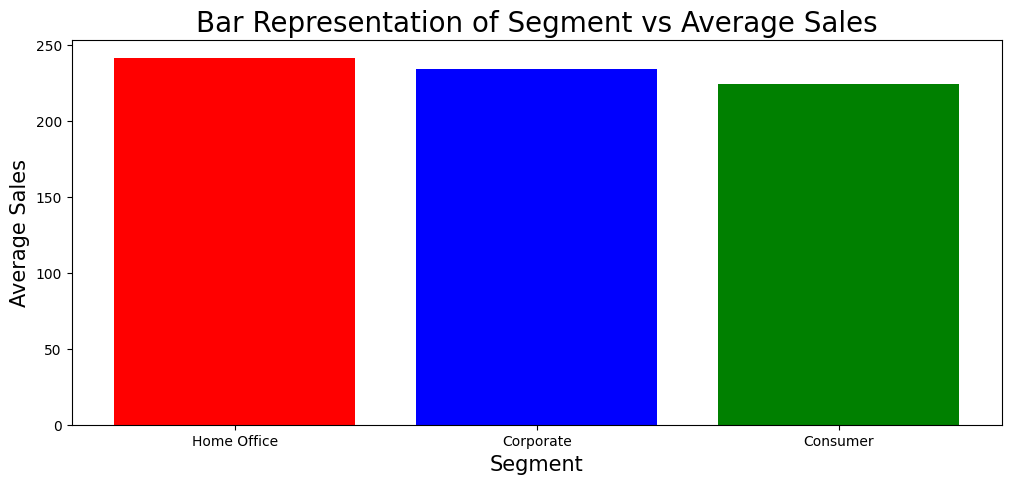

In [42]:
df_segment = df_segment.sort_values(by='Sales', ascending=False)  

plt.figure(figsize=(12, 5))
colors = ["red", "blue", "green"]
plt.bar(df_segment.index, df_segment['Sales'], color=colors)
plt.xlabel("Segment", fontsize=15)
plt.ylabel("Average Sales", fontsize=15)
plt.title("Bar Representation of Segment vs Average Sales", fontsize=20)
plt.xticks(rotation=0)  
plt.show()

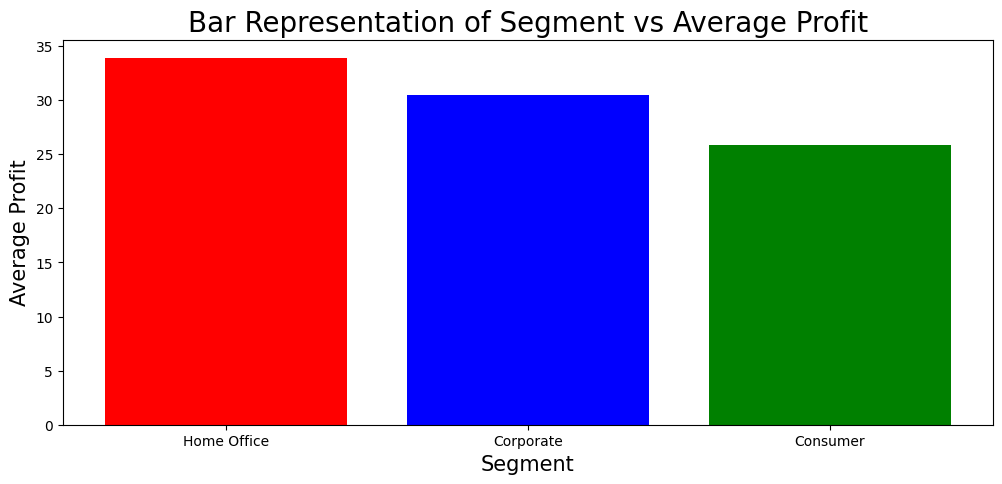

In [43]:
df_segment = df_segment.sort_values(by='Profit', ascending=False) 

plt.figure(figsize=(12, 5))
colors = ["red", "blue", "green"]
plt.bar(df_segment.index, df_segment['Profit'], color=colors)
plt.xlabel("Segment", fontsize=15)
plt.ylabel("Average Profit", fontsize=15)
plt.title("Bar Representation of Segment vs Average Profit", fontsize=20)
plt.xticks(rotation=0)  
plt.show()

### Observations from Segment Wise Analysis :

 - Highest segment contributor = Consumers (51.9 %)
 - Highest sales and profit segment = Home Office

#### Category Wise Analysis

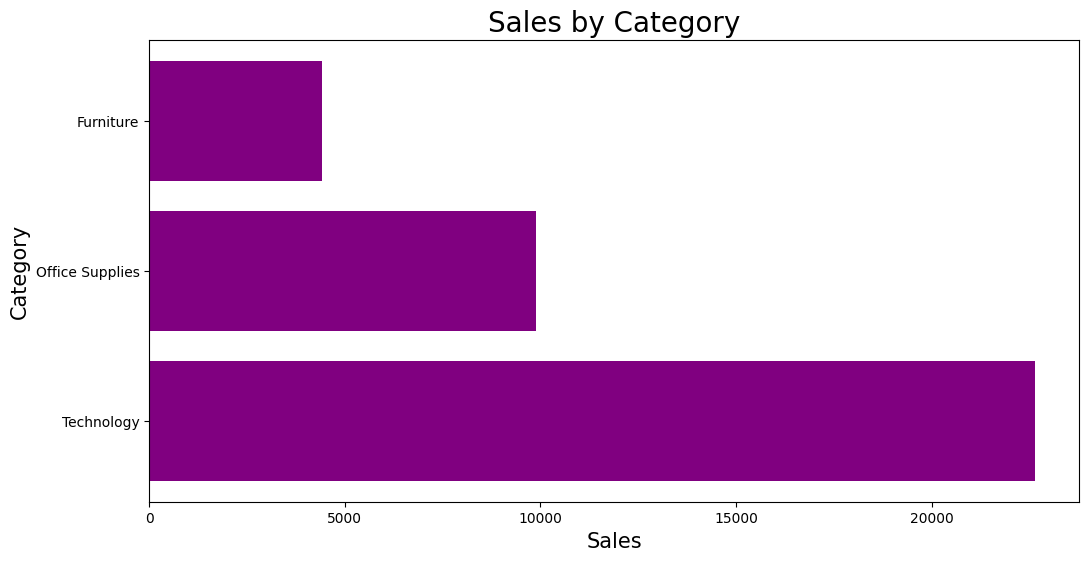

In [44]:
plt.figure(figsize=(12, 6))
plt.barh(df['Category'], df['Sales'], color="purple")
plt.xlabel("Sales", fontsize=15)
plt.ylabel("Category", fontsize=15)
plt.title("Sales by Category", fontsize=20)
plt.gca().invert_yaxis()  
plt.show()

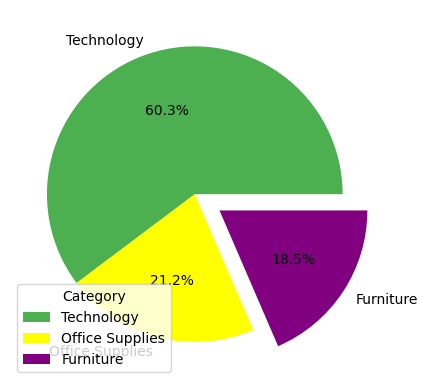

In [45]:
labels = ["Technology", "Office Supplies", "Furniture"]
mycolors = ["#4CAF50", "yellow", "purple"]
myexplode = [0, 0, 0.2]
plt.pie(df["Category"].value_counts(), labels=labels, autopct='%1.1f%%', colors=mycolors, explode = myexplode)
plt.legend(title="Category")

#### Now we can see that Technology and Office supplies are most demanding 

<Figure size 1200x400 with 0 Axes>

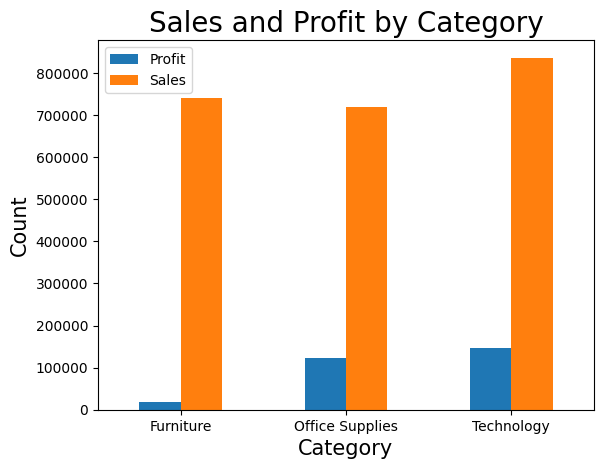

In [46]:
plt.figure(figsize=(12,4))
df.groupby("Category")[["Profit", "Sales"]].sum().plot.bar()
plt.xlabel("Category", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Sales and Profit by Category", fontsize=20)
plt.xticks(rotation=0)
plt.show()

#### Now we can see that Technoloy and Office supplies have high sales and more profit whereas furniture has also high sales but the amount of profit is very less 

### Observations from Category Wise Analysis : 

 - Highest Orders = Technology (60.3 %)
 - Highest sales and profit categories are = Technology and Office Supplies

#### Region Wise Analysis 

In [47]:
df_region = df["Region"].value_counts()
df_region

Region
West       3193
East       2845
Central    2319
South      1620
Name: count, dtype: int64

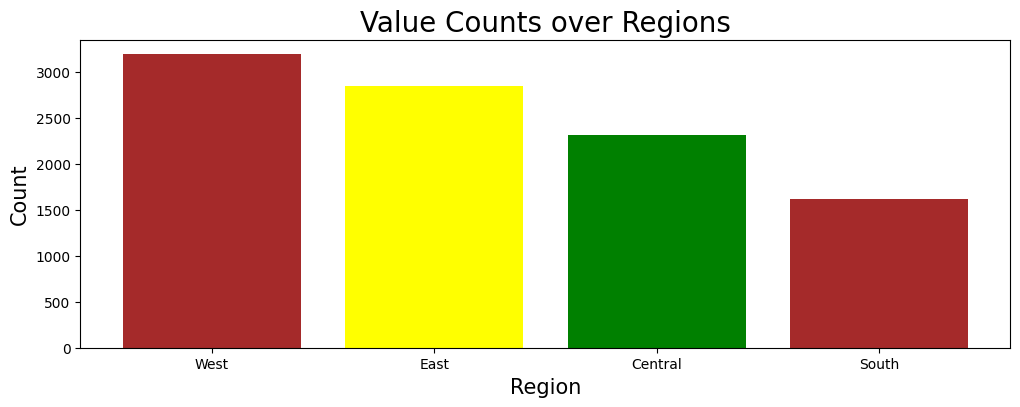

In [49]:
plt.figure(figsize=(12,4))
colors = ['brown', 'yellow', 'green']
plt.bar(df_region.index, df_region.values, color=colors)
plt.xlabel("Region", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Value Counts over Regions", fontsize=20)
plt.show()

#### As we can see majority of the counts is from West region 

In [50]:
df_region = df.groupby(["Region"])[["Sales", "Profit"]].mean()
df_region

,Sales,Profit
Region,,
Central,215.947759,17.100421
East,238.465798,32.163905
South,241.803645,28.857673
West,227.139254,33.927281


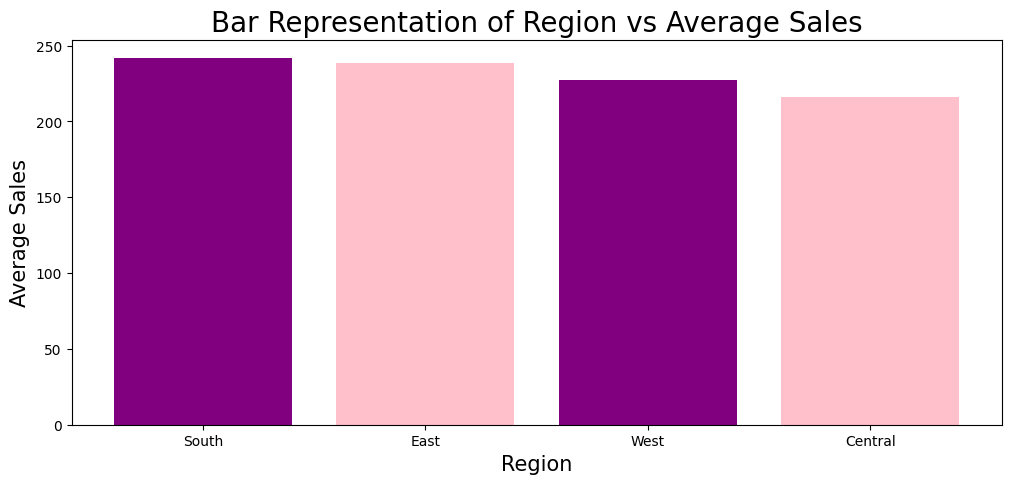

In [51]:
df_region = df_region.sort_values(by='Sales', ascending=False) 

plt.figure(figsize=(12, 5))
colors = ["purple", "pink", "purple", "pink"]
plt.bar(df_region.index, df_region['Sales'], color=colors)
plt.xlabel("Region", fontsize=15)
plt.ylabel("Average Sales", fontsize=15)
plt.title("Bar Representation of Region vs Average Sales", fontsize=20)
plt.xticks(rotation=0)  
plt.show()

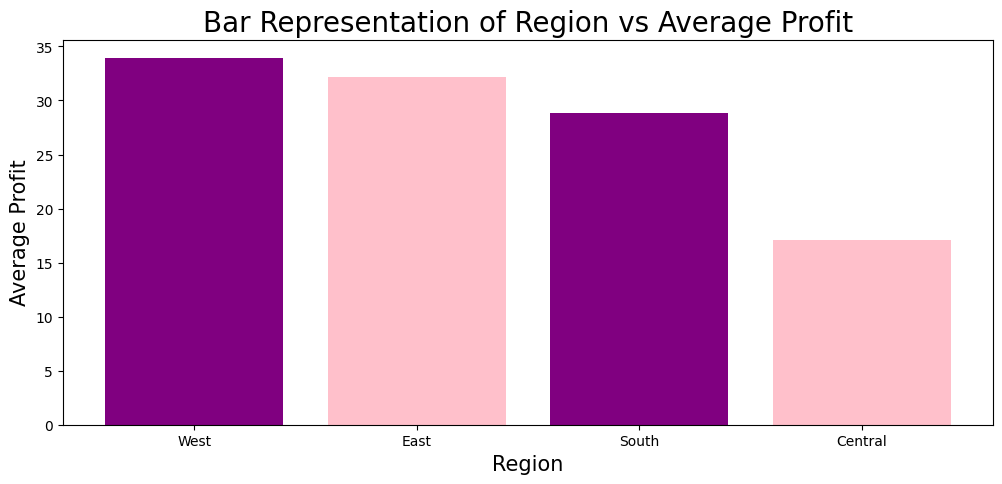

In [52]:
df_region = df_region.sort_values(by='Profit', ascending=False)  
plt.figure(figsize=(12, 5))
colors = ["purple", "pink", "purple", "pink"]
plt.bar(df_region.index, df_region['Profit'], color=colors)
plt.xlabel("Region", fontsize=15)
plt.ylabel("Average Profit", fontsize=15)
plt.title("Bar Representation of Region vs Average Profit", fontsize=20)
plt.xticks(rotation=0)  
plt.show()


C:\PerfLogs\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\PerfLogs\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\PerfLogs\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


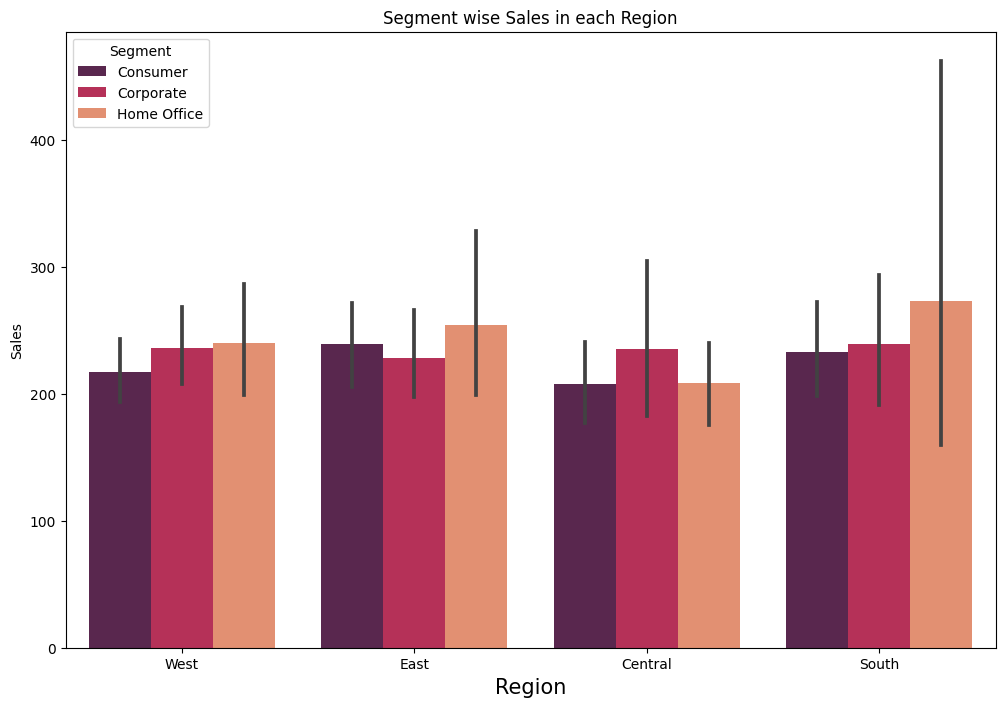

In [53]:
plt.figure(figsize=(12,8))
plt.title('Segment wise Sales in each Region')
sns.barplot(x='Region',y='Sales',data=df,hue='Segment',order=df['Region'].value_counts().index,palette='rocket')
plt.xlabel('Region',fontsize=15)
plt.show()

### Observations from Region Wise Analysis : 

 - Highest number of counts is from = West Region
 - Highest number of sales = South and East
 - Highest number of profit = West and East
 - Segment wise sales are almost same in every region

#### Sub-Category wise Analysis

In [54]:
df_subcategory = df["Sub-Category"].value_counts()
df_subcategory

Sub-Category
Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: count, dtype: int64

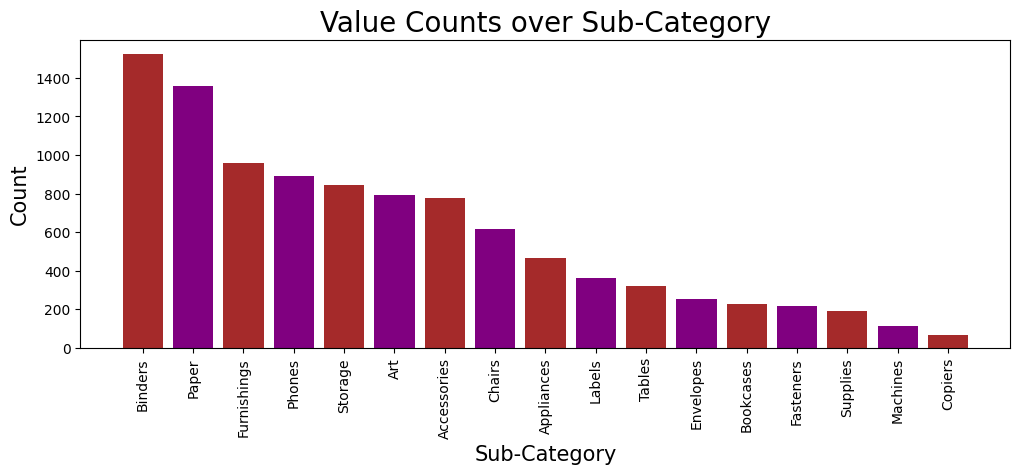

In [55]:
plt.figure(figsize=(12,4))

colors= ["brown", "purple"]
plt.bar(df_subcategory.index, df_subcategory.values, color=colors)
plt.xlabel("Sub-Category", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Value Counts over Sub-Category", fontsize=20)
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Sub-category wise distribution of orders')

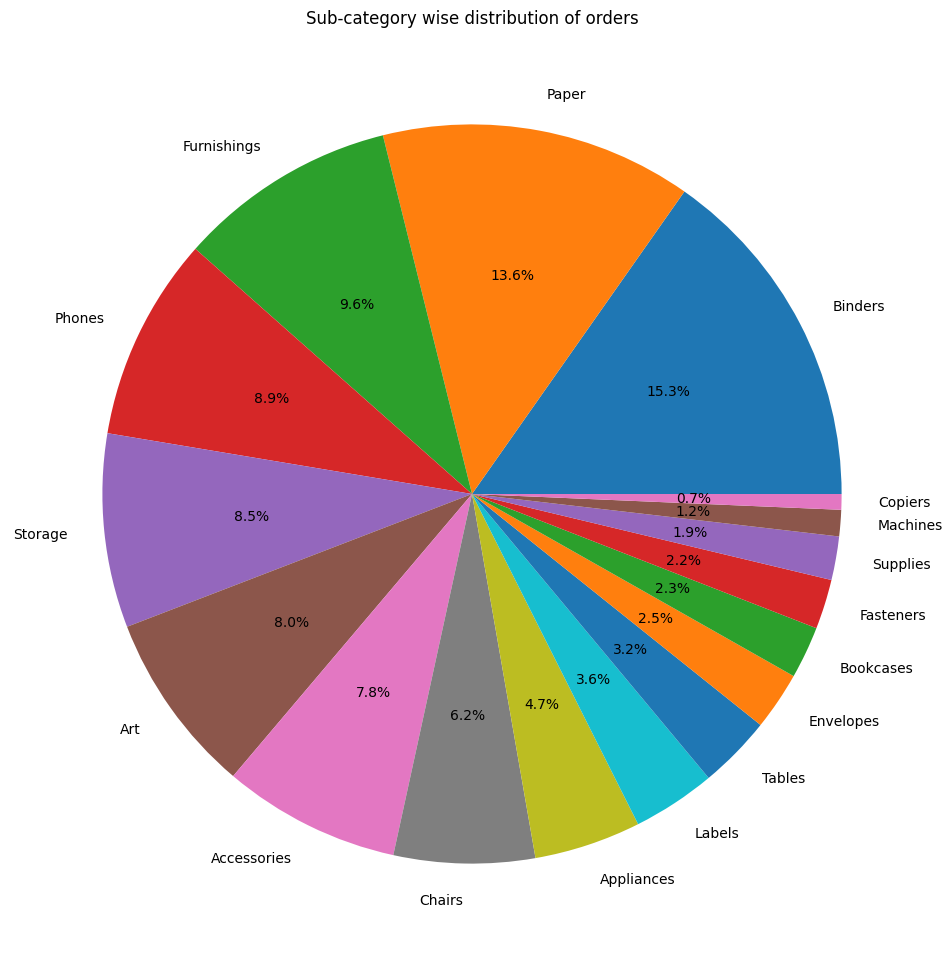

In [56]:
plt.figure(figsize=(14, 12))
plt.pie(df["Sub-Category"].value_counts(), autopct='%1.1f%%', labels=df_subcategory.index)
plt.title('Sub-category wise distribution of orders')

In [57]:
df_sub_sum=df.groupby("Sub-Category").sum()
df_sub_sum

,Ship Mode,Segment,Country,City,State,Region,Category,Sales,Quantity,Discount,Profit
Sub-Category,,,,,,,,,,,
Accessories,Second ClassFirst ClassStandard ClassFirst Cla...,ConsumerCorporateConsumerConsumerConsumerConsu...,United StatesUnited StatesUnited StatesUnited ...,Los AngelesEaganDoverTroyLos AngelesRochesterC...,CaliforniaMinnesotaDelawareNew YorkCaliforniaM...,WestCentralEastEastWestCentralCentralWestSouth...,TechnologyTechnologyTechnologyTechnologyTechno...,167380.3180,2976,60.80,41936.6357
Appliances,Standard ClassStandard ClassStandard ClassFirs...,ConsumerHome OfficeCorporateCorporateCorporate...,United StatesUnited StatesUnited StatesUnited ...,Los AngelesFort WorthFremontDecaturSaint PaulI...,CaliforniaTexasNebraskaAlabamaMinnesotaMissour...,WestCentralCentralSouthCentralCentralWestCentr...,Office SuppliesOffice SuppliesOffice SuppliesO...,107532.1610,1729,77.60,18138.0054
Art,Standard ClassSecond ClassStandard ClassStanda...,ConsumerConsumerCorporateConsumerConsumerConsu...,United StatesUnited StatesUnited StatesUnited ...,Los AngelesSan FranciscoFremontPhiladelphiaPhi...,CaliforniaCaliforniaNebraskaPennsylvaniaPennsy...,WestWestCentralEastEastEastWestWestWestSouthCe...,Office SuppliesOffice SuppliesOffice SuppliesO...,27107.0320,2996,59.60,6524.6118
Binders,Standard ClassStandard ClassStandard ClassSeco...,ConsumerConsumerHome OfficeConsumerConsumerCon...,United StatesUnited StatesUnited StatesUnited ...,Los AngelesSeattleFort WorthSan FranciscoLos A...,CaliforniaWashingtonTexasCaliforniaCaliforniaP...,WestWestCentralWestWestEastEastCentralCentralE...,Office SuppliesOffice SuppliesOffice SuppliesO...,203409.1690,5971,566.20,30228.0003
Bookcases,Second ClassStandard ClassStandard ClassFirst ...,ConsumerConsumerHome OfficeHome OfficeHome Off...,United StatesUnited StatesUnited StatesUnited ...,HendersonPhiladelphiaHoustonNew York CityNew Y...,KentuckyPennsylvaniaTexasNew YorkNew YorkOhioO...,SouthEastCentralEastEastEastEastEastEastCentra...,FurnitureFurnitureFurnitureFurnitureFurnitureF...,114879.9963,868,48.14,-3472.5560
Chairs,Second ClassSecond ClassStandard ClassStandard...,ConsumerConsumerHome OfficeConsumerConsumerHom...,United StatesUnited StatesUnited StatesUnited ...,HendersonPhiladelphiaHoustonNew AlbanyTroyChic...,KentuckyPennsylvaniaTexasIndianaNew YorkIllino...,SouthEastCentralCentralEastCentralSouthSouthCe...,FurnitureFurnitureFurnitureFurnitureFurnitureF...,327777.7610,2351,104.70,26567.1278
Copiers,Second ClassSecond ClassStandard ClassStandard...,ConsumerConsumerConsumerHome OfficeConsumerCor...,United StatesUnited StatesUnited StatesUnited ...,Los AngelesDes MoinesSan FranciscoGreat FallsS...,CaliforniaWashingtonCaliforniaMontanaCaliforni...,WestWestWestWestWestWestCentralEastEastWestEas...,TechnologyTechnologyTechnologyTechnologyTechno...,149528.0300,234,11.00,55617.8249
Envelopes,Standard ClassStandard ClassStandard ClassSeco...,ConsumerHome OfficeCorporateConsumerConsumerCo...,United StatesUnited StatesUnited StatesUnited ...,PhiladelphiaHoustonDurhamColumbusColumbusWilmi...,PennsylvaniaTexasNorth CarolinaOhioOhioDelawar...,EastCentralSouthEastEastEastWestWestWestEastEa...,Office SuppliesOffice SuppliesOffice SuppliesO...,16476.4020,906,20.40,6964.1767
Fasteners,Standard ClassSecond ClassFirst ClassStandard ...,CorporateConsumerCorporateConsumerConsumerCons...,United StatesUnited StatesUnited StatesUnited ...,New York CityColumbusColumbusRosevilleSaginawD...,New YorkOhioOhioCaliforniaMichiganOhioNew Jers...,EastEastEastWestCentralEastEastEastWestWestWes...,Office SuppliesOffice SuppliesOffice SuppliesO...,3024.2800,914,17.80,949.5182


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Accessories'),
  Text(1, 0, 'Appliances'),
  Text(2, 0, 'Art'),
  Text(3, 0, 'Binders'),
  Text(4, 0, 'Bookcases'),
  Text(5, 0, 'Chairs'),
  Text(6, 0, 'Copiers'),
  Text(7, 0, 'Envelopes'),
  Text(8, 0, 'Fasteners'),
  Text(9, 0, 'Furnishings'),
  Text(10, 0, 'Labels'),
  Text(11, 0, 'Machines'),
  Text(12, 0, 'Paper'),
  Text(13, 0, 'Phones'),
  Text(14, 0, 'Storage'),
  Text(15, 0, 'Supplies'),
  Text(16, 0, 'Tables')])

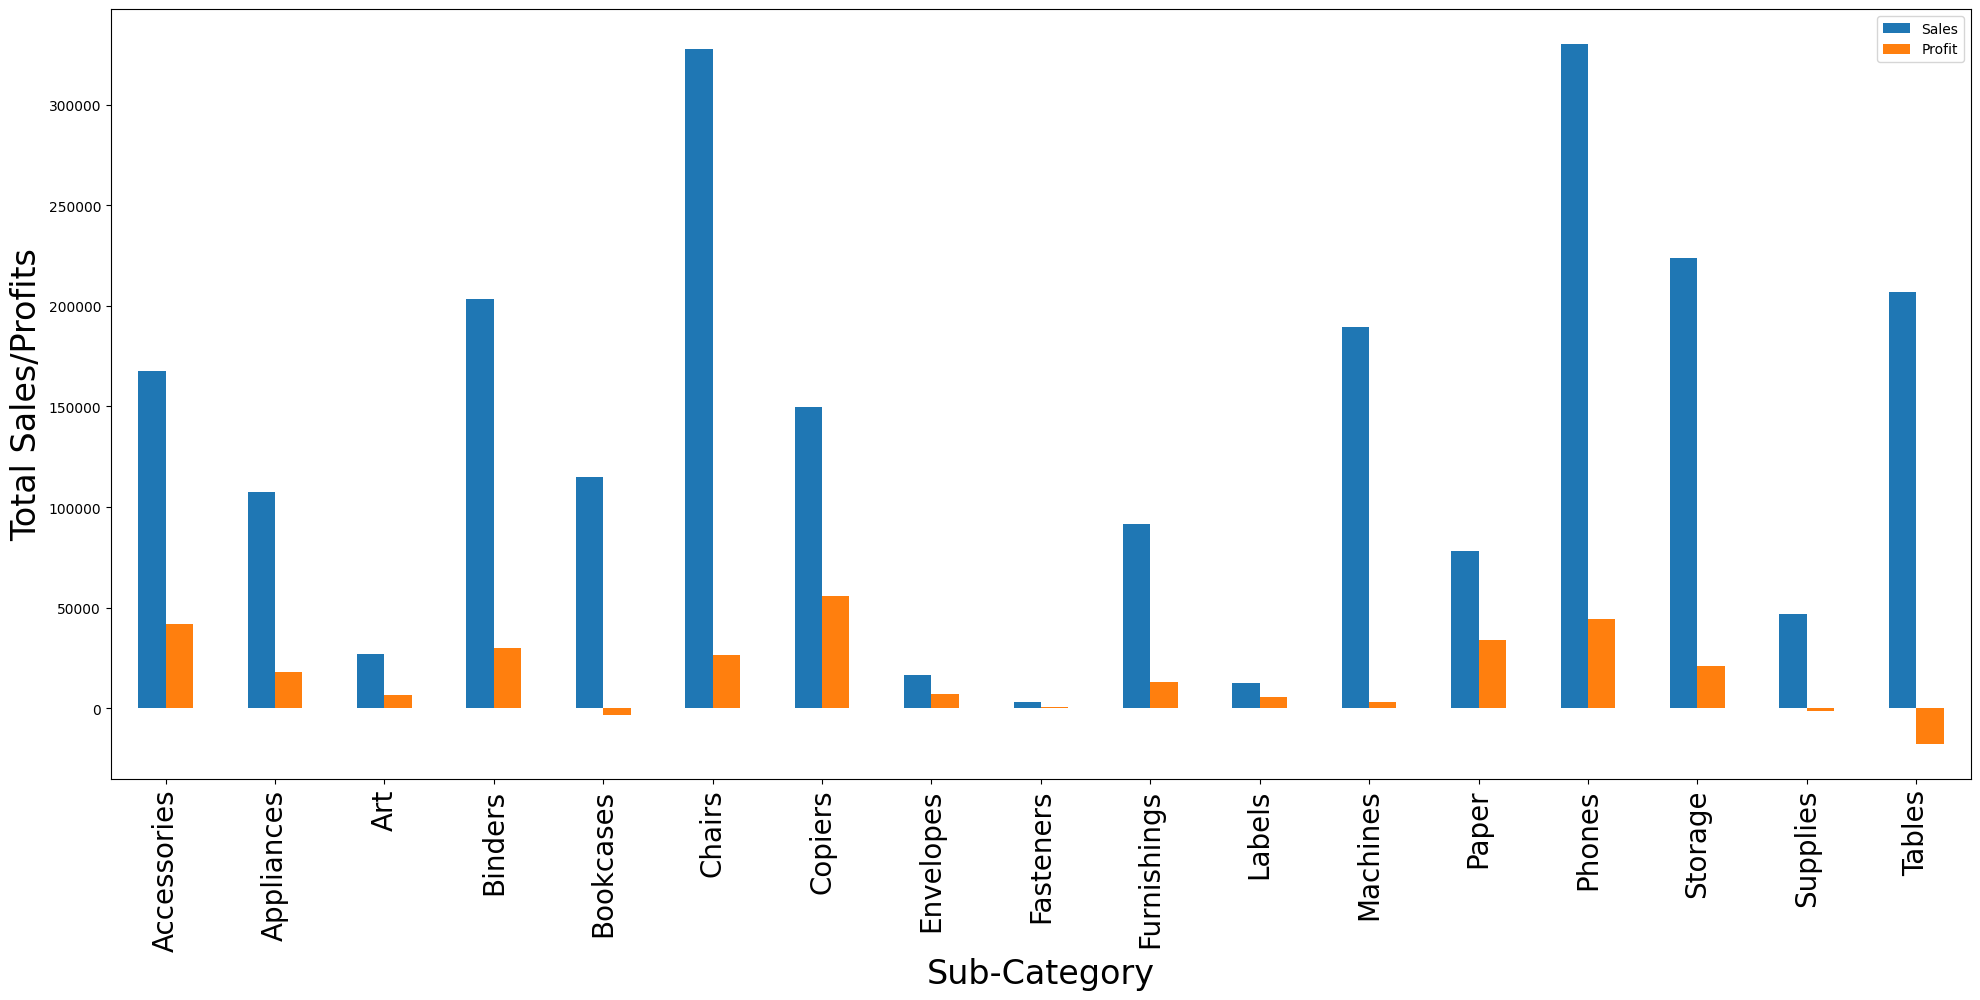

In [58]:
df_sub_sum[['Sales', 'Profit']].plot(kind = 'bar', figsize = [24,10])
plt.ylabel('Total Sales/Profits',fontsize = 24)
plt.xlabel("Sub-Category",fontsize = 24)
plt.xticks(fontsize=20)

### Observations from Sub-Category wise Analysis :

 - Highest Orders = Binders
 - Lowest Orders = Copiers
 - Highest Sales = Phones
 - Lowest Sales = Fasteners
 - Highest Profit = Copiers
 - Lowest profit = Tables(Loss)

### Discount Analysis

 - High Discount results in Low Profit
 - High Discount results in High Sales

## Thank You